In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


In [18]:
#laddar in datasetet
# #df = pd.read_csv("car_price_dataset.csv")   Detta fungerade inte eftersom filen inte är kommaseparerad. Justerar separator till ;


df_raw = pd.read_csv("car_price_dataset.csv", sep=";")    #original
df = df_raw.copy()    # arbetskopia 



df.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [19]:
#df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [20]:
#df.isnull().sum()
#ger samma resultat som .info()

In [21]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


10 000 bilar, numreriska kolumner
stor spridning på mileage (outliers att hantera?)


<Axes: title={'center': 'Antal per bilmärke'}, xlabel='Märke', ylabel='Antal'>

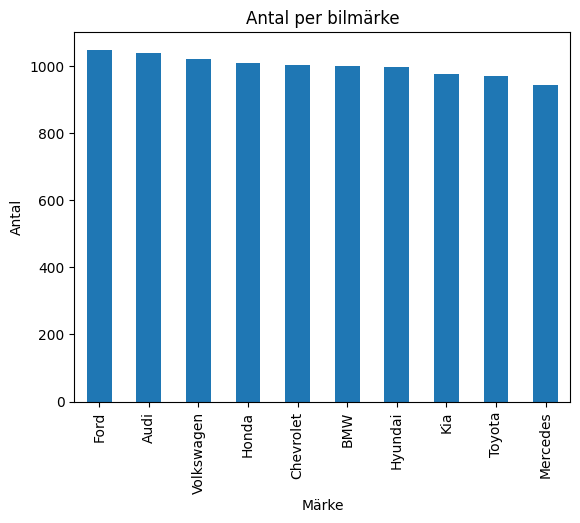

In [22]:

#df["Brand"].value_counts().plot(kind="bar")  samma kod som nedan men utan rubriker

df["Brand"].value_counts().plot(
    kind="bar",
    title="Antal per bilmärke",
    xlabel="Märke",
    ylabel="Antal"
)

#får fram ett stapeldiagram med antal bilar per märke, hur kategorierna fördelar sig/förekommer


In [23]:
df.nunique()
#kolla antal unika värden i datasetet, kardinalitet, alltså hur många olika kategorier inom varje kolumn

Brand             10
Model             30
Year              24
Engine_Size       41
Fuel_Type          4
Transmission       3
Mileage         9854
Doors              4
Owner_Count        5
Price           6661
dtype: int64

<Axes: title={'center': 'Antal per modell'}, xlabel='Modell', ylabel='Antal'>

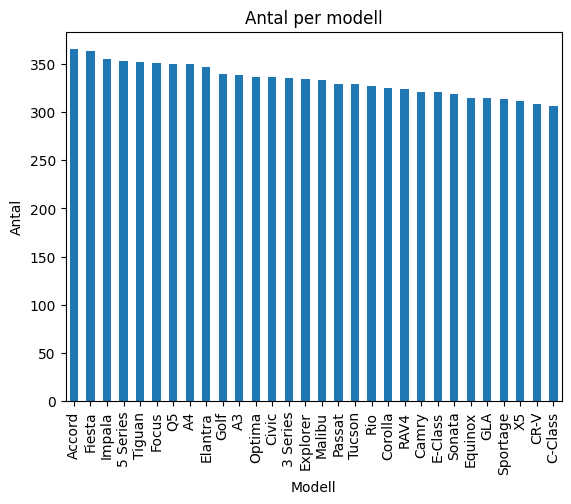

In [24]:
df["Model"].value_counts().plot(
    kind="bar",
    title="Antal per modell",
    xlabel="Modell",
    ylabel="Antal"
)


<Axes: title={'center': 'Antal per bränsletyp'}, xlabel='Bränsletyp', ylabel='Antal'>

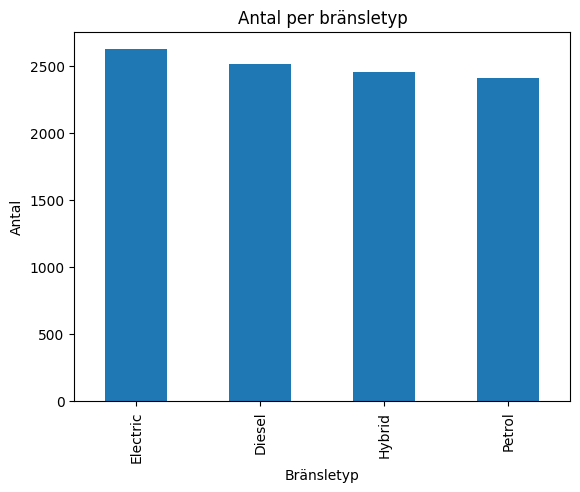

In [25]:
df["Fuel_Type"].value_counts().plot(
    kind="bar",
    title="Antal per bränsletyp",
    xlabel="Bränsletyp",
    ylabel="Antal"
)

<Axes: title={'center': 'Typ av växellåda'}, xlabel='Växellåda', ylabel='Antal'>

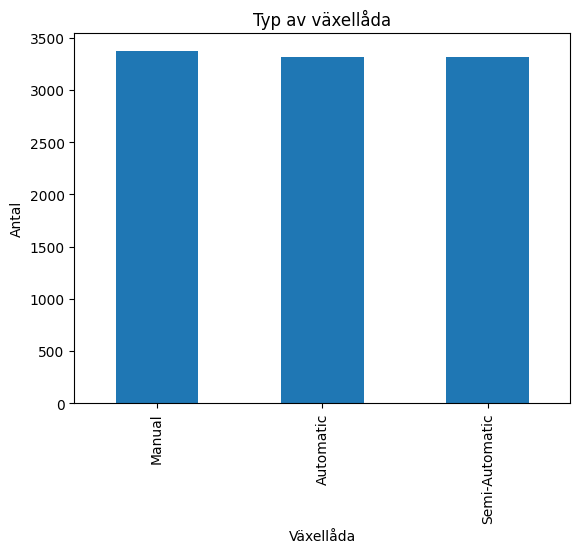

In [26]:
df["Transmission"].value_counts().plot(
    kind="bar",
    title="Typ av växellåda",
    xlabel="Växellåda",
    ylabel="Antal"
)

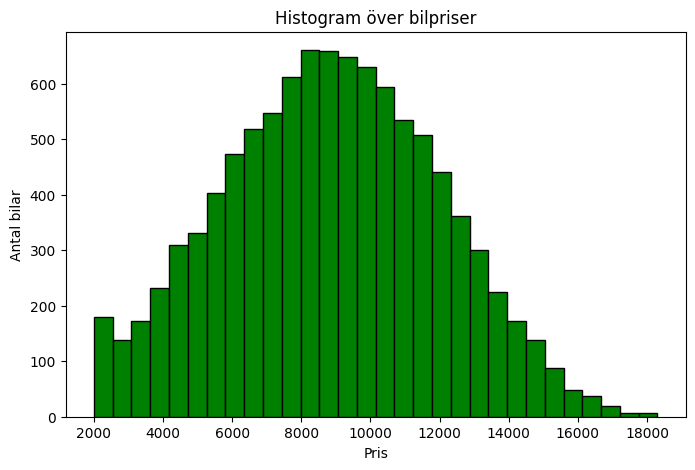

In [35]:
plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=30, color='green', edgecolor='black')
plt.title("Histogram över bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()

In [36]:
#Create X and y and perform train-test split


# Features (alla kolumner utom Price)
X = df.drop(columns=["Price"])

# Target (det vi vill prediktera)
y = df["Price"]

# Snabb kontroll
X.shape, y.shape


((10000, 9), (10000,))

In [37]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

X_train.shape, X_test.shape


((8000, 9), (2000, 9))

In [38]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

numeric_features, categorical_features
#identifierar numreriska kolumner och kategoriska kolumner på X-träningsdatan


(Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count'], dtype='object'),
 Index(['Brand', 'Model', 'Fuel_Type', 'Transmission'], dtype='object'))

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   #Numeriska saknade värden ersätts med median, är robust mot outliers, stabilt i produktion och bra för prisdata
    ("scaler", StandardScaler())
])



categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),    #kategoriska saknade värden ersätts med det vanligaste värdet i kolumnen, t ex Fuel_Type vid NaN-värden.
    ("onehot", OneHotEncoder(handle_unknown="ignore"))       #nya/okända kategorier ignoreras. Modellen kraschar inte och prediktionen fungerar ändå
])



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

#Kategoriska variabler omvandlades till numeriska med One-Hot Encoding. 
#Preprocessing implementerades i en pipeline tillsammans med imputering och skalning för att säkerställa korrekt hantering vid korsvalidering och modellträning.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score   #returnerar mått (t ex RMSE) för jämförelser. Ungefär samma som cross_validate (som visar fler mått och tider samtidigt)
from sklearn.pipeline import Pipeline




För en enkel baseline-modell används 5-faldig korsvalidering med cross_val_score. För modeller med hyperparametrar används GridSearchCV, som genomför korsvalidering och modellval automatiskt.

In [41]:
linreg_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])


In [ ]:
# Korsvalidering körs ENDAST på träningsdata (X_train, y_train).
# Testdata (X_test, y_test) används inte här.

cv_scores = cross_val_score(
    linreg_pipe,
    X_train,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    error_score="raise"
)

# Gör om till positiva RMSE-värden
cv_rmse = -cv_scores

print("Linear Regression CV RMSE (mean):", cv_rmse.mean())
print("Linear Regression CV RMSE (std):", cv_rmse.std())

# Träna nu modellen på hela träningsdatan (inför test-utvärdering)
linreg_pipe.fit(X_train, y_train)




Linear Regression CV RMSE (mean): 89.06271055955224
Linear Regression CV RMSE (std): 16.838777417684675


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

Modellen tränas 5 gånger, preprocessing körs alltid på rätt sätt innan och RMSE beräknas

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Testdata används ENDAST här (slutlig utvärdering)
y_pred = linreg_pipe.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Test RMSE:", test_rmse)



In [43]:

relative_error = cv_rmse.mean() / y_train.mean()
print("Relativt fel:", relative_error)


Relativt fel: 0.010087810672705982


Ridge Regression är en regulariserad variant av linjär regression där en straffterm läggs till för att minska risken för överanpassning.
Den är ett bra nästa steg när man har många features.

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [45]:
ridge_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge())
])


In [47]:
# GridSearchCV kör korsvalidering ENDAST på träningsdata.
# Testdata används inte här.

param_grid_ridge = {
    "model__alpha": [0.01, 0.1, 1, 10, 50, 100]
}

gs_ridge = GridSearchCV(
    ridge_pipe,
    param_grid=param_grid_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    error_score="raise"
)

gs_ridge.fit(X_train, y_train)

print("Ridge best params:", gs_ridge.best_params_)
print("Ridge CV RMSE:", -gs_ridge.best_score_)




for mean, std, alpha in zip(
    -gs_ridge.cv_results_["mean_test_score"],
    gs_ridge.cv_results_["std_test_score"],
    gs_ridge.cv_results_["param_model__alpha"]
):
    print(f"alpha={alpha}: RMSE={mean:.2f}, std={std:.2f}")



Ridge best params: {'model__alpha': 0.01}
Ridge CV RMSE: 89.0606128066141
alpha=0.01: RMSE=89.06, std=16.84
alpha=0.1: RMSE=89.06, std=16.84
alpha=1.0: RMSE=89.07, std=16.79
alpha=10.0: RMSE=89.49, std=16.20
alpha=50.0: RMSE=97.05, std=12.77
alpha=100.0: RMSE=115.79, std=8.29
